In [1]:
from importlib.resources import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
training_url = "./data/adult-training.csv"
testing_url = "./data/adult-test.csv"

# merge training and testing datasets for EDA

training_df = pd.read_csv(training_url, header=None, skiprows=1 )
testing_df = pd.read_csv(testing_url, header=None, skiprows=1)

df = pd.concat([training_df, testing_df], ignore_index=True)

In [3]:
training_df.shape, testing_df.shape, df.shape

((32560, 15), (16281, 15), (48841, 15))

In [27]:
# print the head of training dataset without truncating the columns

pd.set_option('display.max_columns', None)
print(training_df.head())

   0                  1       2           3   4                    5   \
0  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
1  38            Private  215646     HS-grad   9             Divorced   
2  53            Private  234721        11th   7   Married-civ-spouse   
3  28            Private  338409   Bachelors  13   Married-civ-spouse   
4  37            Private  284582     Masters  14   Married-civ-spouse   

                   6               7       8        9   10  11  12  \
0     Exec-managerial         Husband   White     Male   0   0  13   
1   Handlers-cleaners   Not-in-family   White     Male   0   0  40   
2   Handlers-cleaners         Husband   Black     Male   0   0  40   
3      Prof-specialty            Wife   Black   Female   0   0  40   
4     Exec-managerial            Wife   White   Female   0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  


In [28]:
# Set plot_flag to True if you want to generate plots
plot_flag = True
# plot_flag = False

In [17]:
def summarize_dataframe(df):
    print("--------------------------------------------------------------------")
    print("DataFrame Summary")
    print("--------------------------------------------------------------------")
    print(f"Total Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}\n")

    print("The column names in the DataFrame are:\n", df.columns.tolist())
    print("\n")
    
    print("Column Data Types:")
    print(df.dtypes)
    print("\n")

    print("Missing Values per Column:")
    print(df.isnull().sum())
    print("\n")

    print("Statistical Summary of Numerical Columns:")
    print(df.describe().T)
    print("\n")

    print("Statistical Summary of Categorical Columns:")
    print(df.describe(include=["object"]).T)
    print("\n")

    print("Unique Values per Column:")
    for col in df.columns:
        unique_values = df[col].nunique()
        print(f"Column {col}: {unique_values} unique values")
    print("--------------------------------------------------------------------")

    print("\n")

    print("The number of duplicate rows in the DataFrame:\n", df.duplicated().sum())

In [18]:
def plot_dataframe(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns

    nrows = 5
    ncols = 2

    print('--------------------------------------------------------------------')
    print('Distribution of the Numerical Columns')
    print('--------------------------------------------------------------------')
    plt.figure(figsize=(14, 5*nrows))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(nrows, ncols, i)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}', fontsize=20)

        plt.xlabel(col, fontsize=20)
        plt.ylabel('Frequency', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=1)
    plt.show()
    plt.close()

    print('--------------------------------------------------------------------')
    print('Boxplot of the Numerical Columns')
    print('--------------------------------------------------------------------')
    plt.figure(figsize=(28, 48))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}', fontsize=20)
        plt.xlabel(col, fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=1)
    plt.show()
    plt.close()

    print('--------------------------------------------------------------------')
    print('Correlation Matrix of Numerical Columns')
    print('--------------------------------------------------------------------')
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap', fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    plt.close()

    print('--------------------------------------------------------------------')
    print('Distribution of the Categorical Columns')
    print('--------------------------------------------------------------------')
    for i in range(0, len(categorical_cols), 6):
        subset = categorical_cols[i:i+6]
        nrows = math.ceil(len(subset) / ncols)

        plt.figure(figsize=(14, 5 * nrows))
        plt.suptitle("Categorical Column Distributions", fontsize=20, y=5)

        for j, col in enumerate(subset, 1):
            if col != 13:
                plt.subplot(nrows, ncols, j)
                sns.countplot(y=df[col])  # Flip axes for readability
                plt.title(f'Distribution of {col}', fontsize=16)
                plt.xlabel('Frequency', fontsize=14)
                plt.ylabel(col, fontsize=14)
                plt.xticks(fontsize=12)
                plt.yticks(fontsize=12)

        plt.tight_layout(pad=2.0)
        plt.subplots_adjust(top=0.9, hspace=0.6, wspace=0.4)
        plt.show()
        plt.close()
    
    plt.figure(figsize=(14, 25))
    sns.countplot(y=df[13])
    plt.title('Distribution of 13', fontsize=16) 
    plt.xlabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [19]:
summarize_dataframe(df)

--------------------------------------------------------------------
DataFrame Summary
--------------------------------------------------------------------
Total Rows: 48841
Total Columns: 15

The column names in the DataFrame are:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


Column Data Types:
0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object


Missing Values per Column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


Statistical Summary of Numerical Columns:
      count           mean            std      min       25%       50%  \
0   48841.0      38.643578      13.710650     17.0      28.0      37.0   
2   48841.0  189666.430786  105603.887256  12285.0  117555.0  178147.0   
4   48841.0      10.078029       2.570965      1.0       9

In [ ]:
if plot_flag:
    plot_dataframe(df)

In [36]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

In [ ]:
outlier_info = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    mask = (df[col] < lb) | (df[col] > ub)
    cnt = int(mask.sum())
    pct = cnt / len(df) * 100
    outlier_info.append((col, cnt, pct, lb, ub, mask))

In [38]:
outlier_df = pd.DataFrame([{"col": c, "count": cnt, "pct": pct} for c, cnt, pct, *_ in outlier_info]).sort_values("count", ascending=False)

In [ ]:

    outlier_df = outlier_df.sort_values("count", ascending=False).reset_index(drop=True)
    plt.figure(figsize=(10, max(4, 0.6*len(outlier_df))))
    sns.barplot(x="count", y="col", data=outlier_df, palette="viridis")
    for i, row in outlier_df.iterrows():
        x_off = max(1, 0.01 * (row["count"] if row["count"]>0 else 1))
        plt.text(row["count"] + x_off, i, f'{int(row["count"])} ({row["pct"]:.2f}%)', va="center")
    plt.title("Outlier Counts per Numerical Column")
    plt.xlabel("Outlier count")
    plt.ylabel("Column")
    plt.tight_layout()
    plt.show()

C:\Users\hghus\AppData\Local\Temp\ipykernel_45432\3997134453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="col", data=outlier_df, palette="viridis")
C:\Users\hghus\AppData\Local\Temp\ipykernel_45432\3997134453.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


C:\Users\hghus\AppData\Local\Temp\ipykernel_45432\2427182541.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="col", data=outlier_df, palette="viridis")
C:\Users\hghus\AppData\Local\Temp\ipykernel_45432\2427182541.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


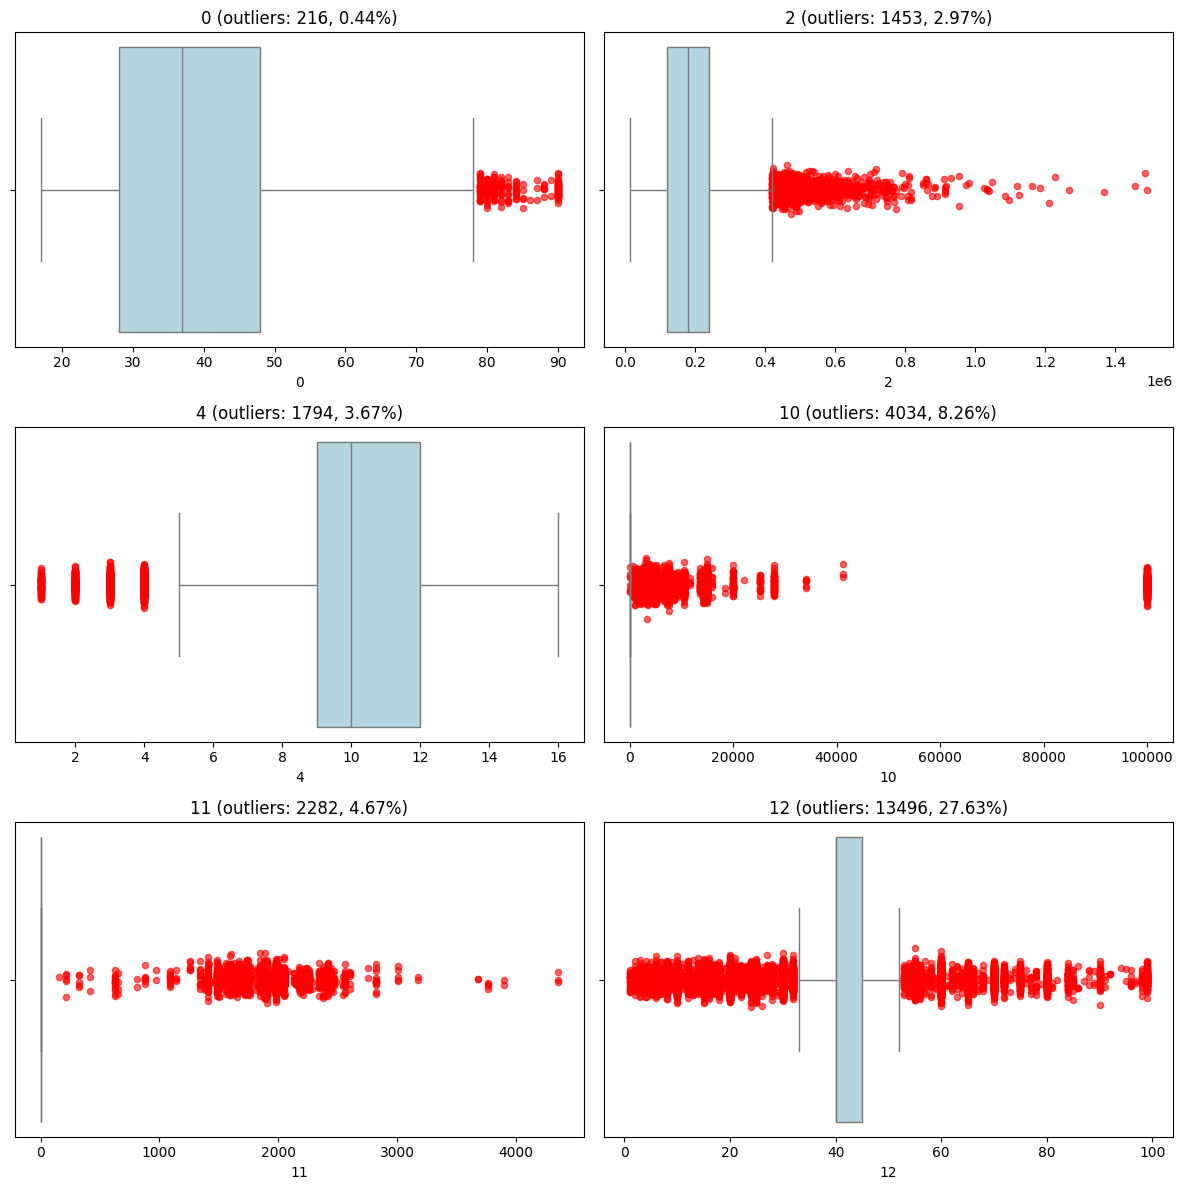

In [ ]:
# Boxplots with outliers highlighted, paginate if many cols
cols = [c for c, *_ in outlier_info]
for i in range(0, len(cols), 6):
    subset = cols[i:i+6]
    n = len(subset)
    ncols = 2
    nrows = math.ceil(n / ncols)
    plt.figure(figsize=(12, 4*nrows))
    for j, col in enumerate(subset, 1):
        _, _, _, lb, ub, mask = next(x for x in outlier_info if x[0] == col)
        ax = plt.subplot(nrows, ncols, j)
        sns.boxplot(x=df[col], ax=ax, color="lightblue", showfliers=False)
        # overlay outliers
        out_vals = df.loc[mask, col].dropna().values
        if len(out_vals):
            jitter = np.random.normal(0, 0.02, size=len(out_vals))
            ax.scatter(out_vals, np.zeros_like(out_vals) + jitter, color="red", alpha=0.6, s=20, label="outliers")
        ax.set_title(f"{col} (outliers: {int(mask.sum())}, {mask.sum()/len(df)*100:.2f}%)")
        ax.set_xlabel(col)
    plt.tight_layout()
    plt.show()